In [2]:
%matplotlib inline
import numpy
import pandas
import pandas as pd
import numpy as np
import matplotlib
import datetime

In [14]:
todays_date = datetime.datetime.now().date()
L = 60 * 60 * 24 * 7 # N days
index = pd.date_range(todays_date, periods=L, freq='s')
# random walk + gaussian noise
matrix = (np.cumsum(np.random.randn(L, 1)) + 30 * np.random.randn(1, L)).transpose()
# perform a random walk by summing f
df_original = pd.DataFrame(matrix, index=index, columns=['V']).reset_index()

In [21]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def round(df, floor):
    df = df.copy()
    df['rounded_time'] = pd.DatetimeIndex(df['index']).floor(floor) 
    return df

def do_all_aggregates(df):
    # include 'count': 'count' if count is needed
    return df.groupby('rounded_time').agg({
        'V': {
            'p10': percentile(10),
            'p50': percentile(50),
            'p95': percentile(95),
            'p99': percentile(99),
            'p999': percentile(99),
        }
    })

In [22]:
def plot_with_floor(floor):
    df = round(df_original, floor)
    df_agg = do_all_aggregates(df)
    df_agg.plot(title="Bin size: %s" % floor)

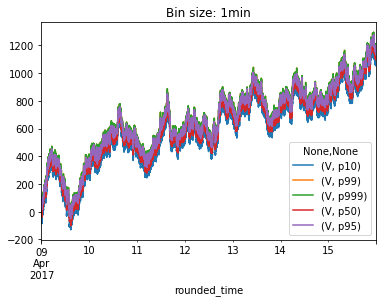

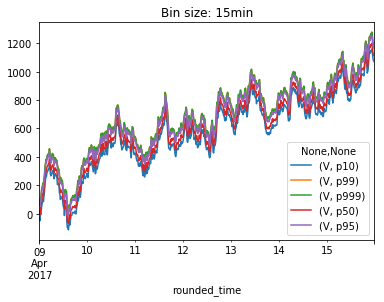

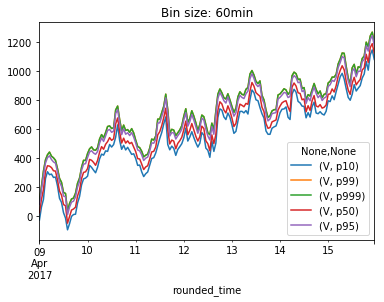

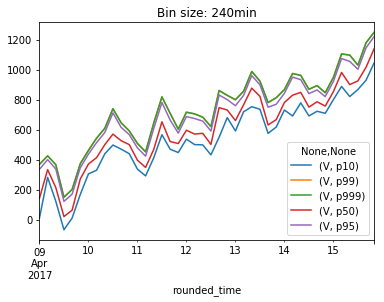

In [19]:
plot_with_floor('1min')
plot_with_floor('15min')
plot_with_floor('60min')
plot_with_floor('240min')